**K-Means Clustering**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read Data
df = pd.read_excel("EastWestAirlines.xlsx")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df['Award?'].value_counts()

0    2518
1    1481
Name: Award?, dtype: int64

In [5]:
y = df['Award?']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Award?, dtype: int64

In [6]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
ID#                  3999 non-null int64
Balance              3999 non-null int64
Qual_miles           3999 non-null int64
cc1_miles            3999 non-null int64
cc2_miles            3999 non-null int64
cc3_miles            3999 non-null int64
Bonus_miles          3999 non-null int64
Bonus_trans          3999 non-null int64
Flight_miles_12mo    3999 non-null int64
Flight_trans_12      3999 non-null int64
Days_since_enroll    3999 non-null int64
Award?               3999 non-null int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
#Dropping ID column
df.drop(['ID#'], axis=1, inplace=True)

In [37]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [40]:
df1 = df.copy()

In [43]:
df1.drop(['Award?'], axis=1, inplace=True)

In [44]:
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [36]:
#using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scalerMinMax = MinMaxScaler()

In [45]:
scalerMinMax.fit(df1)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [46]:
scaled_MinMax = scalerMinMax.transform(df1)

In [47]:
df_scaled_MinMax = pd.DataFrame(scaled_MinMax, columns=df1.columns)

In [48]:
df_scaled_MinMax.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=355)

In [51]:
y_pred_MinMax = kmeans.fit_predict(df_scaled_MinMax)

In [52]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [54]:
#Adding cluster column
df_scaled_MinMax['clusterMinMax'] = y_pred_MinMax
df_scaled_MinMax.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterMinMax
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,1
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1


In [55]:
df_scaled_MinMax['clusterMinMax'].value_counts()

0    2573
1    1426
Name: clusterMinMax, dtype: int64

In [60]:
#Sum of Squared Error and lopping the k-value in 1 to 15
sumSqaureError = []
k1 = range(1,15)
for i in k:
    kmc = KMeans(n_clusters=i)
    kmc.fit(df_scaled_MinMax)
    sumSqaureError.append(kmc.inertia_)

In [57]:
sumSqaureError

[1815.7744581697393,
 448.9989194445698,
 331.555226848179,
 272.39276621164294,
 241.7585047651309,
 217.76439497419176,
 200.21552603215568,
 186.68003758914148,
 175.37507827083883]

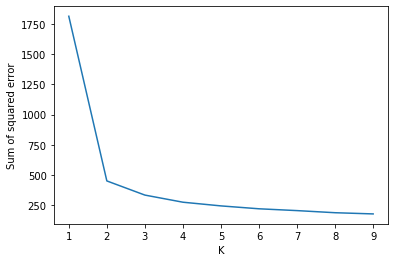

In [67]:
#Plotting K vs SumSqaureError
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k,sumSqaureError)

In [ ]:
#Using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(df)

In [12]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns)

In [13]:
df_feat.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [14]:
df_new = df_feat.drop(['Award?'], axis = 1)

In [38]:
df_new.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1


In [17]:
#Initializing K-Means
km = KMeans(n_clusters=2, random_state=355)

In [18]:
y_pred = km.fit_predict(df_new)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
km.cluster_centers_

array([[-0.29078812, -0.06597226, -0.51783956,  0.02301856, -0.06093252,
        -0.47144228, -0.41308992, -0.16878003, -0.18695792, -0.18852311],
       [ 0.67344214,  0.15278651,  1.1992752 , -0.05330916,  0.14111487,
         1.09182278,  0.95668336,  0.39088112,  0.43297967,  0.43660451]])

In [22]:
#Adding cluster column
df_new['cluster']=y_pred
df_new.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1
5,-0.567483,-0.186299,-0.769578,-0.098242,-0.062767,-0.709992,-1.208203,-0.328603,-0.362168,1.367365,0
6,0.112270,-0.186299,0.683121,-0.098242,-0.062767,0.428076,1.395256,-0.328603,-0.362168,1.392549,1
7,-0.523459,-0.186299,-0.769578,-0.098242,-0.062767,-0.492582,-0.791649,-0.150036,-0.098503,1.365428,0
8,3.666042,-0.186299,0.683121,6.675367,-0.062767,-0.637398,3.269747,2.421330,2.801807,1.370271,1
9,0.310220,-0.186299,0.683121,-0.098242,-0.062767,0.467168,1.707671,0.492805,0.428826,1.362038,1


In [23]:
df_new['cluster'].value_counts()

0    2792
1    1207
Name: cluster, dtype: int64

In [24]:
#Sum of Squared Error and lopping the k-value in 1 to 15
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_new)
    sse.append(km.inertia_)

In [25]:
sse

[40832.69667416855,
 32088.266130210635,
 27689.498508982884,
 23965.512359104036,
 21622.218596501672,
 17900.127162163095,
 15984.343310888105,
 14572.531811662324,
 13489.227048405073]

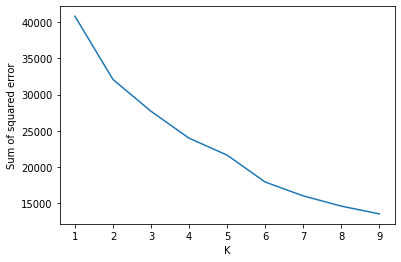

In [26]:
#Plotting K vs SSE
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [27]:
km.labels_

array([3, 3, 3, ..., 6, 0, 0])

**Hierarchical Clustering**

In [31]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as sch

In [32]:
df_feat

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [33]:
z = linkage(df_feat, method='complete', metric='euclidean')

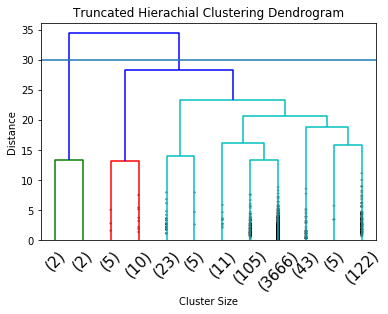

In [34]:
#generate dendrogram
dendrogram(z,truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=110)
plt.axhline(65)
plt.axhline(30)
plt.show()